In [3]:
# Import necessary libraries for the Jupyter notebook
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options for better readability in Jupyter notebooks
sns.set_theme(style="whitegrid")

# Load the CSV file after EDA
df_after_eda = pd.read_csv('data_after_EDA.csv')

# Perform EDA visualizations
# Define the numeric variables to include in the correlation matrix
numeric_vars = ['year', 'pos_home', 'pos_away', 'age_home', 'age_away',
                'height_home', 'height_away', 'avg_val_home', 'avg_val_away',
                'assists_home', 'assists_away', 'red_home', 'red_away',
                'yellow_home', 'yellow_away', 'ntr_home', 'ntr_away',
                'seats', 'goals_home', 'goals_away', 'attendance']

# Correlation matrix heatmap to 1 decimal place
correlation_matrix = df_after_eda[numeric_vars].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, square=True, cmap='coolwarm', annot=True, fmt='.1f')
plt.xticks(rotation='vertical')
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

# Horizontal bar charts for frequency of formations with adjusted font size
plt.figure(figsize=(10, 10))  # Increased figure height for better readability
sns.countplot(data=df_after_eda, y='formation_home', order=df_after_eda['formation_home'].value_counts().index)
plt.title('Frequency of Different Home Formations')
plt.xlabel('Frequency')
plt.ylabel('Home Formation')
plt.show()

plt.figure(figsize=(10, 10))  # Increased figure height for better readability
sns.countplot(data=df_after_eda, y='formation_away', order=df_after_eda['formation_away'].value_counts().index)
plt.title('Frequency of Different Away Formations')
plt.xlabel('Frequency')
plt.ylabel('Away Formation')
plt.show()

# Load the second CSV file after feature engineering
df_after_features = pd.read_csv('data_after_features.csv')

# Perform EDA_2 visualizations
# Distribution of Year
plt.figure(figsize=(8, 5))
sns.countplot(data=df_after_features, x='year')
plt.title('Distribution of Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

# Distribution of Occupancy Rate
plt.figure(figsize=(8, 5))
sns.histplot(df_after_features['occupancy'], bins=30, kde=True)
plt.title('Distribution of Occupancy Rate')
plt.xlabel('Occupancy Rate')
plt.ylabel('Frequency')
plt.show()

# Country league table
country_league_table = pd.crosstab(df_after_eda['country'], df_after_eda['league'], margins=False)
print(country_league_table)

# Combined bar plots of average goals by home and away strategy on subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

df_avg_goals_home = df_after_features.groupby('strategy_home')['goals_home'].mean().reset_index()
sns.barplot(ax=axes[0], data=df_avg_goals_home, x='strategy_home', y='goals_home')
axes[0].set_title('Average Home Goals by Strategy')
axes[0].set_xlabel('Strategy')
axes[0].set_ylabel('Average Home Goals')
axes[0].tick_params(axis='x', rotation=45)

df_avg_goals_away = df_after_features.groupby('strategy_away')['goals_away'].mean().reset_index()
sns.barplot(ax=axes[1], data=df_avg_goals_away, x='strategy_away', y='goals_away')
axes[1].set_title('Average Away Goals by Strategy')
axes[1].set_xlabel('Strategy')
axes[1].set_ylabel('Average Away Goals')
axes[1].tick_params(axis='x', rotation=45)

plt.show()


KeyError: "['avg_val_home', 'avg_val_away'] not in index"

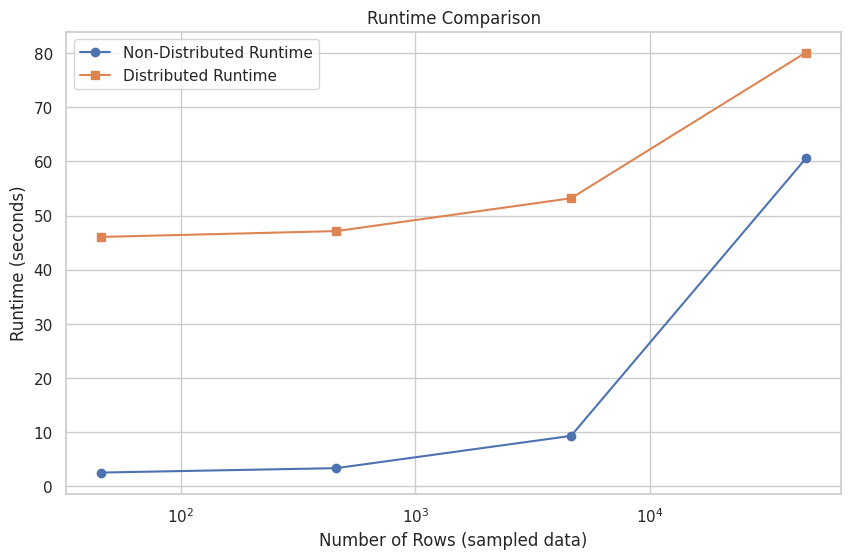

In [11]:
import matplotlib.pyplot as plt

# Provided runtime data
non_distributed_runtimes = [2.4932093620300293, 3.306260347366333, 9.27463960647583, 60.57812476158142]
distributed_runtimes = [46.05683732032776, 47.12898302078247, 53.2026572227478, 80.14110851287842]
fractions = [0.001, 0.01, 0.1, 1.0]
num_rows = [46000 * fraction for fraction in fractions]

# Plot the runtimes
plt.figure(figsize=(10, 6))
plt.plot(num_rows, non_distributed_runtimes, label='Non-Distributed Runtime', marker='o')
plt.plot(num_rows, distributed_runtimes, label='Distributed Runtime', marker='s')
plt.xlabel('Number of Rows (sampled data)')
plt.ylabel('Runtime (seconds)')
plt.title('Runtime Comparison')
plt.legend()
plt.grid(True)
plt.xticks(num_rows)  # Set x-ticks to be explicitly based on the num_rows
plt.xscale('log')
plt.show()
